#### The binary classification

1. Split the dataset into train/val/test.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# load the dataset
data = pd.read_csv('Assignment3-Breast-Cancer-Diagnose.csv')
data = data.loc[:, ~data.columns.str.contains('Unnamed')]
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# split into train/val/test
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

2. Define features and labels.

In [13]:
# features and labels
X_train = train_data.drop(['id', 'diagnosis'], axis=1).values
y_train = train_data['diagnosis'].values
X_val = val_data.drop(['id', 'diagnosis'], axis=1).values
y_val = val_data['diagnosis'].values
X_test = test_data.drop(['id', 'diagnosis'], axis=1).values
y_test = test_data['diagnosis'].values

3. Logistic Regression

In [16]:
# train the logistic regression model
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)

# predict and evaluate the LR model.
y_pred_lr = lr_model.predict(X_val)
accuracy_lr_val = accuracy_score(y_val, y_pred_lr)
y_pred_test_lr = lr_model.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_test_lr)

4. Support Vector Machine

In [15]:
# train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# predict and evaluate the SVM model.
y_pred_svm_val = svm_model.predict(X_val)
accuracy_svm_val = accuracy_score(y_val, y_pred_svm_val)
y_pred_test_svm = svm_model.predict(X_test)
accuracy_svm_test = accuracy_score(y_test, y_pred_test_svm)

5. Random Forest

In [17]:
# train the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# predict and evaluate the RF model.
y_pred_rf_val = rf_model.predict(X_val)
accuracy_rf_val = accuracy_score(y_val, y_pred_rf_val)
y_pred_test_rf = rf_model.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_test_rf)

6. Preliminary output of the performance of each model on the validation set and test set.

In [18]:
# create DataFrame
results = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "Random Forest"],
    "Validation Accuracy": [accuracy_lr_val, accuracy_svm_val, accuracy_rf_val],
    "Test Accuracy": [accuracy_lr_test, accuracy_svm_test, accuracy_rf_test]
})

# output
styled_results = results.style.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]},
                                                 {'selector': 'td', 'props': [('text-align', 'center')]}])
styled_results

,Model,Validation Accuracy,Test Accuracy
0,Logistic Regression,0.956044,0.956140
1,SVM,0.945055,0.956140
2,Random Forest,0.967033,0.964912


***

#### Hyperparameter tuning

1. Select the most common hyperparameters for each model.

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter ranges
param_grid_lr = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}

2. Since the dataset is not large, grid search is used as the method for hyperparameter tuning.

In [20]:
# Use GridSearchCV for hyperparameter tuning
lr_grid_search = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=1000), param_grid_lr, cv=5)
svm_grid_search = GridSearchCV(SVC(kernel='linear'), param_grid_svm, cv=5)
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)

3. Perform hyperparameter tuning for each model.

In [21]:
# Hyperparameter tuning for logistic regression
lr_grid_search.fit(X_train, y_train)
best_lr_model = lr_grid_search.best_estimator_

# Hyperparameter tuning for SVM
svm_grid_search.fit(X_train, y_train)
best_svm_model = svm_grid_search.best_estimator_

# Hyperparameter tuning for random forest
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

4. Evaluate the best model on the validation and test sets after hyperparameter tuning based on accuracy.

In [22]:
# Evaluate best models on validation set
accuracy_lr_val = best_lr_model.score(X_val, y_val)
accuracy_svm_val = best_svm_model.score(X_val, y_val)
accuracy_rf_val = best_rf_model.score(X_val, y_val)

# Evaluate best models on test set
accuracy_lr_test = best_lr_model.score(X_test, y_test)
accuracy_svm_test = best_svm_model.score(X_test, y_test)
accuracy_rf_test = best_rf_model.score(X_test, y_test)

5. Update the output results.

In [23]:
# Update results DataFrame
results.loc[0, "Validation Accuracy"] = accuracy_lr_val
results.loc[0, "Test Accuracy"] = accuracy_lr_test
results.loc[1, "Validation Accuracy"] = accuracy_svm_val
results.loc[1, "Test Accuracy"] = accuracy_svm_test
results.loc[2, "Validation Accuracy"] = accuracy_rf_val
results.loc[2, "Test Accuracy"] = accuracy_rf_test

# Output updated table
styled_results = results.style.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]},
                                                 {'selector': 'td', 'props': [('text-align', 'center')]}])
styled_results

,Model,Validation Accuracy,Test Accuracy
0,Logistic Regression,0.934066,0.947368
1,SVM,0.945055,0.947368
2,Random Forest,0.967033,0.964912


_Based on the results obtained so far, Random Forest has shown the best performance on the validation and test sets. Next, I will further evaluate the performance of each classifier._

***

#### Evaluation process on the performance of difference classifiers

1. First, use a confusion matrix for evaluation.

In [24]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# calculate the confusion matrix
confusion_lr = confusion_matrix(y_test, best_lr_model.predict(X_test))
confusion_svm = confusion_matrix(y_test, best_svm_model.predict(X_test))
confusion_rf = confusion_matrix(y_test, best_rf_model.predict(X_test))

2. Use the four metrics from the confusion matrix (Accuracy, Precision, Recall, and F1 score) as evaluation metrics.

In [25]:
accuracy_lr = accuracy_score(y_test, best_lr_model.predict(X_test))
precision_lr = precision_score(y_test, best_lr_model.predict(X_test))
recall_lr = recall_score(y_test, best_lr_model.predict(X_test))
f1_lr = f1_score(y_test, best_lr_model.predict(X_test))

accuracy_svm = accuracy_score(y_test, best_svm_model.predict(X_test))
precision_svm = precision_score(y_test, best_svm_model.predict(X_test))
recall_svm = recall_score(y_test, best_svm_model.predict(X_test))
f1_svm = f1_score(y_test, best_svm_model.predict(X_test))

accuracy_rf = accuracy_score(y_test, best_rf_model.predict(X_test))
precision_rf = precision_score(y_test, best_rf_model.predict(X_test))
recall_rf = recall_score(y_test, best_rf_model.predict(X_test))
f1_rf = f1_score(y_test, best_rf_model.predict(X_test))

3. Output the confusion matrix and the results of each metric.

In [26]:
data = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
    'Confusion Matrix': [confusion_lr, confusion_svm, confusion_rf],
    'Accuracy': [accuracy_lr, accuracy_svm, accuracy_rf],
    'Precision': [precision_lr, precision_svm, precision_rf],
    'Recall': [recall_lr, recall_svm, recall_rf],
    'F1 Score': [f1_lr, f1_svm, f1_rf]
}
results_df = pd.DataFrame(data)
results_df

,Model,Confusion Matrix,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,"[[69, 2], [4, 39]]",0.947368,0.95122,0.906977,0.928571
1,SVM,"[[69, 2], [4, 39]]",0.947368,0.95122,0.906977,0.928571
2,Random Forest,"[[70, 1], [3, 40]]",0.964912,0.97561,0.930233,0.952381


_Random Forest still topped the LR and SVM model in this evaluation and it seems like the evaluation metrics for logistic regression and SVM are producing the same results on the given test set. This might be because the features in the dataset have similar predictive abilities for these two models. I will continue to analyze other performance metrics to further investigate._

4. Calculate the ROC curve and AUC based on the confusion matrix.

In [27]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, best_lr_model.predict_proba(X_test)[:, 1])
roc_auc_lr = roc_auc_score(y_test, best_lr_model.predict_proba(X_test)[:, 1])

fpr_svm, tpr_svm, _ = roc_curve(y_test, best_svm_model.decision_function(X_test))
roc_auc_svm = roc_auc_score(y_test, best_svm_model.decision_function(X_test))

fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

The results are as follows:

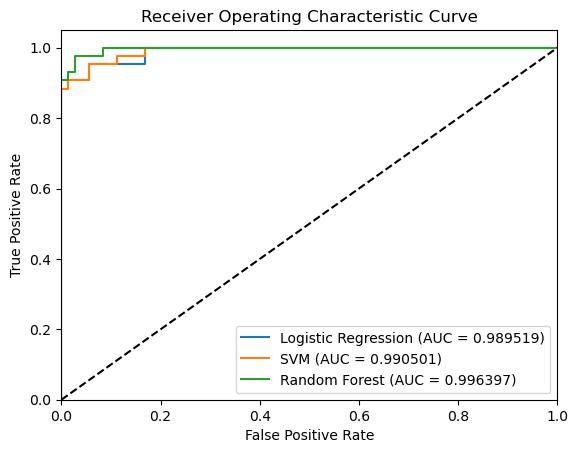

In [28]:
# plotting the ROC 
plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %f)' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %f)' % roc_auc_svm)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

_According to the ROC, the performance of the Random Forest is the best followed by the SVM and the Logistic Regression, with all models having an AUC very close to 1._

An AUC (Area Under the Curve) close to 1.00 usually indicates high performance of the model, but it may also indicate the following issues:

- The dataset may be imbalanced, meaning that the ratio of positive to negative samples is severely unbalanced. In this case, the model may tend to predict the majority class, leading to high true negative rate and false positive rate, thus increasing AUC.
- The model may be overfitting, performing well on the training set but poorly on the test set.

To more comprehensively evaluate the performance of the model, I will continue to use cross-validation.

5. Use the StratifiedKFold cross-validation object for 5-fold cross-validation.  
Cross-validation is a technique used to evaluate the performance and generalization ability of a model. It divides the dataset into k subsets, using one subset as the validation set and the rest as the training set in each iteration. Then, it calculates the performance metric of the model for each validation and takes the average of these metrics to obtain the Mean Cross-Validation Score.

In [31]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the cross-validation object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression cross-validation
lr_scores = cross_val_score(lr_model, X_train, y_train, cv=cv)
lr_mean_score = lr_scores.mean()

# SVM cross-validation
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=cv)
svm_mean_score = svm_scores.mean()

# Random Forest cross-validation
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=cv)
rf_mean_score = rf_scores.mean()

# Output cross-validation results
data = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
    'Mean Cross-Validation Score': [lr_mean_score, svm_mean_score, rf_mean_score]
}
cv_results_df = pd.DataFrame(data)
cv_results_df

,Model,Mean Cross-Validation Score
0,Logistic Regression,0.956126
1,SVM,0.942390
2,Random Forest,0.969787


_A higher Mean Cross-Validation Score indicates better performance of the model in cross-validation. Therefore, it can be seen that the Random Forest model performs the best on this task, while the SVM model performs the worst. However, the cross-validation scores of these three models are actually quite close overall. We can more detailedly evaluate the models by observing how their performance changes on the training and validation sets as the number of samples increases._

6. Plotting learning curves to analyze the model's fit.

_Note: The maximum number of available training samples is 291._

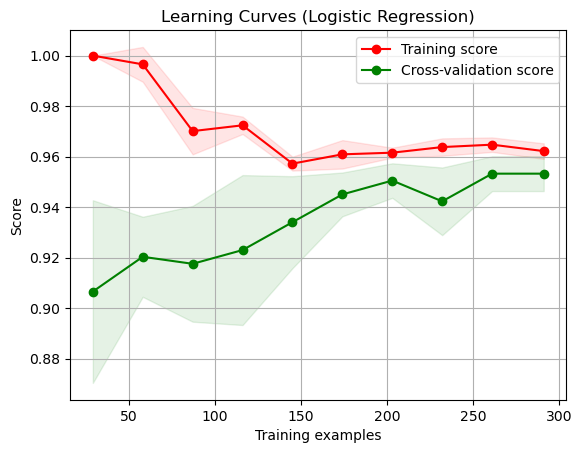

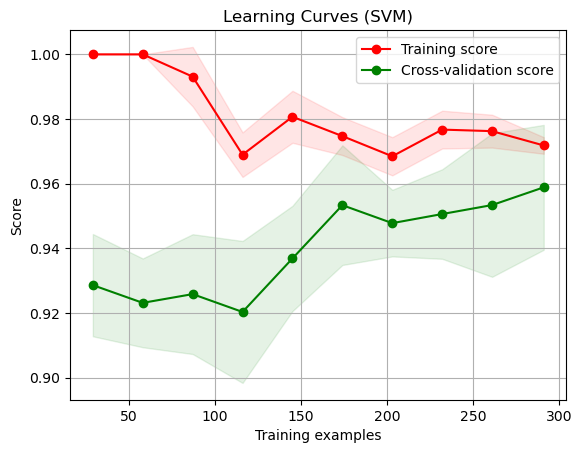

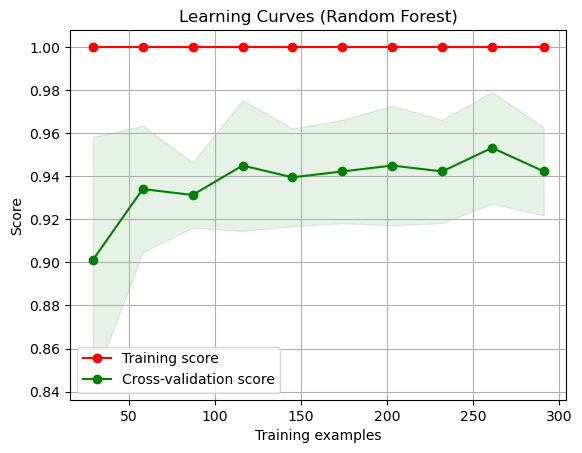

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# 使用逻辑回归模型
title = "Learning Curves (Logistic Regression)"
plot_learning_curve(lr_model, title, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# 使用SVM模型
title = "Learning Curves (SVM)"
plot_learning_curve(svm_model, title, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# 使用随机森林模型
title = "Learning Curves (Random Forest)"
plot_learning_curve(rf_model, title, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.show()

- In smaller training set sizes, the logistic regression model's training score is close to or equal to 1.0, indicating that the model fits small-scale data well. The test score improves with different training set sizes, but in larger training sets, the test score is slightly lower than that of the SVM model.

- The SVM model performs well in smaller training set sizes, with a training score close to or equal to 1.0. Its performance on the test set is stable, with relatively high test scores for different training set sizes, especially in larger training sets.

- The random forest model performs perfectly on the training set, with a training score consistently at 1.0. However, its performance on the test set is slightly lower than that of the logistic regression and SVM models, with significant fluctuations in test scores for different training set sizes.

_All three models, logistic regression, SVM, and random forest, can fit the training data well and perform well on the test set. The performance of logistic regression and SVM on the test set is comparable, but SVM may have a slight advantage in larger training sets. Random forest performs perfectly on the training set but shows some overfitting on the test set, with significant fluctuations in test scores for different training set sizes._

_If a stable model that performs well on various sizes of datasets is needed, SVM may be a good choice. If we are more concerned about performance on the training set, random forest may be a suitable choice. Logistic regression is suitable for small-scale datasets and is also a good choice when model interpretability is important._

***

#### Conclusion

In conclusion, although Random Forest typically performs the best, considering the possibility of overfitting, and in the context of handling medical datasets where we aim for models to generalize well to unseen data, the stability and generalization ability of the model on the test set are crucial. Therefore, Random Forest is not recommended. Taking into account that SVM performs stably on different training set sizes and slightly outperform logistic regression on large-scale training sets, I recommend SVM as the classifier to diagnose whether breast tissues are malignant or benign.